In [1]:
#!pip install concept

You should consider upgrading via the 'C:\Users\Martin\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import umap
import numpy as np
from sklearn.preprocessing import minmax_scale
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [4]:

import c_tf_idf
import image_exemplars
import multimodal

In [5]:
path = '..\\data\\clean\\des_b64_wit_kag_0_of_48.tsv'
df = pd.read_table(path)
texts, images = multimodal.get_image_and_text_from_file(path)

# Embeddings

In [6]:
embedding_model = SentenceTransformer('clip-ViT-B-32')


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [8]:
text_embed = multimodal.get_embeddings_from_text(texts, embedding_model)
image_embed = multimodal.get_embeddings_from_images(images, embedding_model)

combined_embed = [a+b for a,b in zip(text_embed, image_embed)]

  0%|          | 0/18 [00:00<?, ?it/s]

0


  6%|▌         | 1/18 [00:03<00:59,  3.51s/it]

128


 11%|█         | 2/18 [00:03<00:41,  2.58s/it]

256


 17%|█▋        | 3/18 [00:04<00:28,  1.93s/it]

384


 22%|██▏       | 4/18 [00:04<00:20,  1.47s/it]

512


 28%|██▊       | 5/18 [00:05<00:14,  1.14s/it]

640


 33%|███▎      | 6/18 [00:05<00:11,  1.09it/s]

768


 39%|███▉      | 7/18 [00:05<00:08,  1.32it/s]

896


 44%|████▍     | 8/18 [00:06<00:06,  1.55it/s]

1024


 50%|█████     | 9/18 [00:06<00:05,  1.77it/s]

1152


 56%|█████▌    | 10/18 [00:07<00:04,  1.96it/s]

1280


 61%|██████    | 11/18 [00:07<00:03,  2.12it/s]

1408


 67%|██████▋   | 12/18 [00:07<00:02,  2.16it/s]

1536


 72%|███████▏  | 13/18 [00:08<00:02,  2.19it/s]

1664


 78%|███████▊  | 14/18 [00:08<00:01,  2.24it/s]

1792


 83%|████████▎ | 15/18 [00:09<00:01,  2.23it/s]

1920


 89%|████████▉ | 16/18 [00:09<00:00,  2.30it/s]

2048


 94%|█████████▍| 17/18 [00:09<00:00,  2.37it/s]

2176


 94%|█████████▍| 17/18 [00:26<00:01,  1.54s/it]


KeyboardInterrupt: 

# Dimension reduction

In [ ]:
umap_model = umap.UMAP(n_neighbors=5,
                        n_components=5,
                        min_dist=0.1,
                        metric='cosine') # Important that metric is cosine to match clip
# parameters from base concept model

In [ ]:
umap_embedding = umap_model.fit_transform(combined_embed)

<AxesSubplot:>

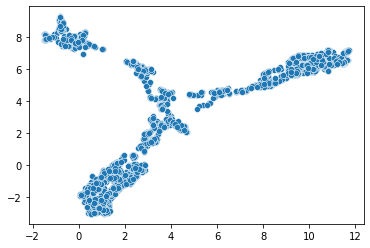

In [ ]:

sns.scatterplot(x=umap_embedding[:,0], y=umap_embedding[:,1])

<AxesSubplot:>

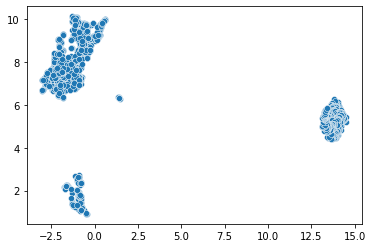

In [ ]:
umap_model2 = umap.UMAP(n_neighbors=5,
                        n_components=5,
                        min_dist=0.1,
                        metric='cosine')

umap_embedding2 = umap_model.fit_transform(text_embed)
sns.scatterplot(x=umap_embedding2[:,0], y=umap_embedding2[:,1])

<AxesSubplot:>

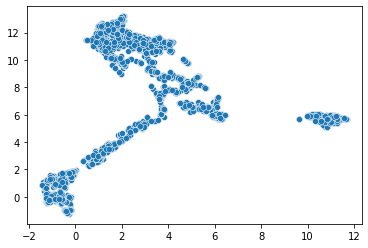

In [ ]:
umap_model3 = umap.UMAP(n_neighbors=5,
                        n_components=5,
                        min_dist=0.1,
                        metric='cosine')

umap_embedding3 = umap_model.fit_transform(image_embed)
sns.scatterplot(x=umap_embedding3[:,0], y=umap_embedding3[:,1])

# Clustering

In [ ]:
umap_embed = umap_embedding

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=40)
clusterer.fit(umap_embed)

HDBSCAN(min_cluster_size=40)

<AxesSubplot:ylabel='$\\lambda$ value'>

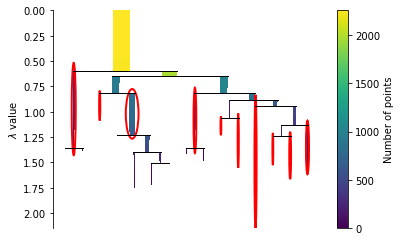

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [ ]:
import plotly.express as px
palette = ['#1c17ff', '#faff00', '#8cf1ff', '#738FAB', '#030080', '#738fab']

u = umap_embed
colors = [str(x) for x in clusterer.labels_]

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=colors,
    color_discrete_sequence=palette
)
fig.update_traces(

)

# C-tf-idf

In [ ]:
tf_idf, classes = c_tf_idf.find_c_tf_idf_from_hdbscan_model(df, clusterer)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 16220/16220 [00:00<00:00, 207942.18it/s]


In [ ]:
top_terms = c_tf_idf.get_top_terms(tf_idf, classes, n=10)
print(top_terms)

[['part', 'town', 'township', 'census', 'county', 'united', 'population', 'city', 'area', 'states'], ['endemic', 'bird', 'plant', 'america', 'found', 'family', 'species', 'genus', 'native', 'known'], ['service', 'class', 'war', 'built', 'united', 'ship', 'world', 'uss', 'navy', 'states'], ['river', 'church', 'south', 'area', 'county', 'city', 'district', 'building', 'located', 'station'], ['approximately', 'malat', 'large', 'classpad', 'development', 'also', 'army', 'asteroid', 'baroque', 'known'], ['energy', 'army', 'czech', 'force', 'republic', 'national', 'municipality', 'guard', 'order', 'district'], ['football', 'national', 'footballer', 'plays', 'league', 'team', 'professional', 'played', 'player', 'basketball'], ['best', 'music', 'american', 'albums', 'member', 'also', 'singer', 'known', 'band', 'rock'], ['work', 'italian', 'novel', 'festival', 'countess', 'la', 'saint', 'marriage', 'german', 'emperor'], ['politician', 'states', 'united', 'army', 'later', 'served', 'american', '

# Images

In [ ]:
cluster_images = image_exemplars.find_image_represenation_of_clusters(clusterer, image_embed, images)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning:

The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




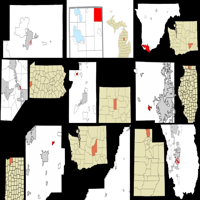
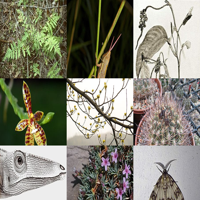
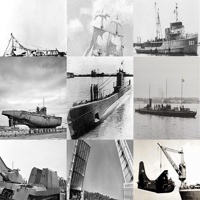
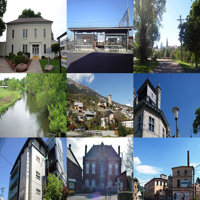
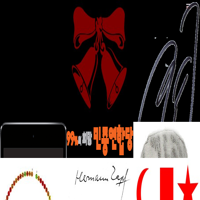
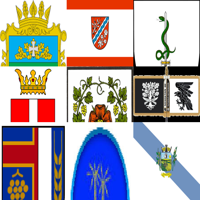
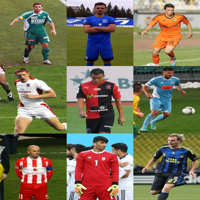
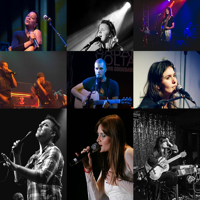
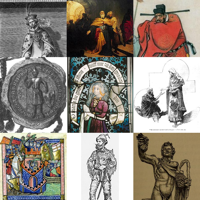
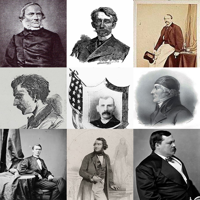


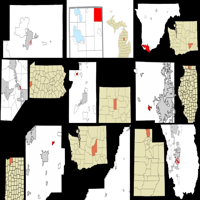
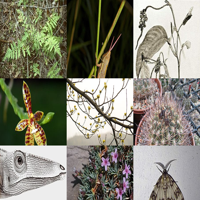
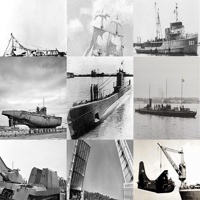
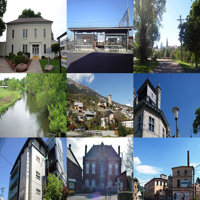
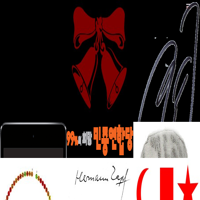
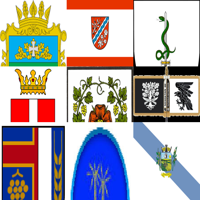
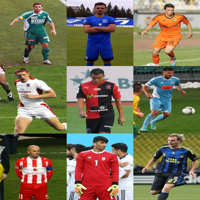
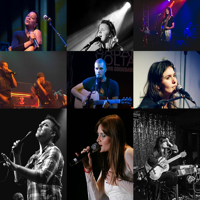
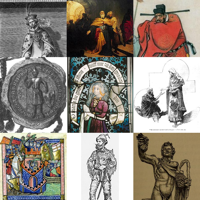
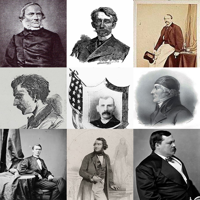

In [ ]:
import ipyplot

ipyplot.plot_images([*cluster_images.values()],custom_texts=top_terms, max_images=20, img_width=150)
